In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [2]:
datos=pd.read_csv(r'C:\Users\bryan\OneDrive - Escuela Superior Politécnica del Litoral\torvis\torvis\SCADA_data_WT2339.csv',header=0)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.DataFrame({'date_time': datos['date_time'] ,'TempEjeLento_1': datos['TempEjeLento_1'], 'TempAmbMean': datos['TempAmbMean'], 'TempRodamMultipMean': datos['TempRodamMultipMean'], 'TempCojLAMean': datos['TempCojLAMean'],'TempCojLOAMean': datos['TempCojLOAMean'], 'TempGenMean': datos['TempGenMean'], 'PotMean': datos['PotMean'], 'VelRotorMean': datos['VelRotorMean']})

In [5]:
cols = df.columns.tolist()

In [6]:
#PotMean
df['PotMean'][df['PotMean']< 0] = None
df['PotMean'][df['PotMean']> 2000] = None
#TempAmbMean
df['TempAmbMean'][df['TempAmbMean']< -5] = None
df['TempAmbMean'][df['TempAmbMean']> 40] = None
#TempCojLAMean
df['TempCojLAMean'][df['TempCojLAMean']< 0] = None
df['TempCojLAMean'][df['TempCojLAMean']> 120] = None
#TempCojLOAMean
df['TempCojLOAMean'][df['TempCojLOAMean']< 0] = None
df['TempCojLOAMean'][df['TempCojLOAMean']> 120] = None
#TempEjeLento_1
df['TempEjeLento_1'][df['TempEjeLento_1']< 0] = None
df['TempEjeLento_1'][df['TempEjeLento_1']> 120] = None
#TempGenMean
df['TempGenMean'][df['TempGenMean']< 0] = None
df['TempGenMean'][df['TempGenMean']> 175] = None
#TempRodamMultipMean
df['TempRodamMultipMean'][df['TempRodamMultipMean']< 0] = None
df['TempRodamMultipMean'][df['TempRodamMultipMean']> 120] = None
#VelRotorMean
df['VelRotorMean'][df['VelRotorMean']< 0] = None
df['VelRotorMean'][df['VelRotorMean']> 50] = None

In [7]:
df['TempAmbMean']=df['TempAmbMean'].interpolate(method='pchip', order=3, limit_area='inside')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='backfill')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='ffill')

df['TempEjeLento_1']=df['TempEjeLento_1'].interpolate(method='pchip', order=3)
df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='backfill')

df['TempRodamMultipMean']=df['TempRodamMultipMean'].interpolate(method='pchip', order=3)
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='backfill')

df['TempCojLAMean']=df['TempCojLAMean'].interpolate(method='pchip', order=3)
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='backfill')

df['TempCojLOAMean']=df['TempCojLOAMean'].interpolate(method='pchip', order=3)
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='backfill')

df['TempGenMean']=df['TempGenMean'].interpolate(method='pchip', order=3)
df['TempGenMean']=df['TempGenMean'].fillna(method='backfill')

df['PotMean']=df['PotMean'].interpolate(method='pchip', order=3)
df['PotMean']=df['PotMean'].fillna(method='backfill')

df['VelRotorMean']=df['VelRotorMean'].interpolate(method='pchip', order=3)
df['VelRotorMean']=df['VelRotorMean'].fillna(method='backfill')

df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='ffill')
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='ffill')
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='ffill')
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='ffill')
df['TempGenMean']=df['TempGenMean'].fillna(method='ffill')
df['PotMean']=df['PotMean'].fillna(method='ffill')
df['VelRotorMean']=df['VelRotorMean'].fillna(method='ffill')

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
datos_listos=df.copy()

In [10]:
#datos en t
datos_t=pd.DataFrame({ 'TempEjeLento_1':df['TempEjeLento_1'],'date_time': df['date_time'] ,})
datos_t.drop([0], inplace=True)
datos_t.reset_index(drop=True, inplace=True)
datos_t

,TempEjeLento_1,date_time
0,2.197280e+01,2013-01-01 00:10:00.0
1,2.197280e+01,2013-01-01 00:20:00.0
2,2.197280e+01,2013-01-01 00:30:00.0
3,2.197280e+01,2013-01-01 00:40:00.0
4,2.197280e+01,2013-01-01 00:50:00.0
...,...,...
357984,-4.154819e+08,2019-10-28 00:10:00.0
357985,-4.155084e+08,2019-10-28 00:20:00.0
357986,-4.155348e+08,2019-10-28 00:30:00.0
357987,-4.155613e+08,2019-10-28 00:40:00.0


In [11]:
#datos en t-1
datos_tmenos1=pd.DataFrame({'TempEjeLento_1-1': df['TempEjeLento_1'],'TempAmbMean-1': df['TempAmbMean'], 'TempRodamMultipMean-1': df['TempRodamMultipMean'],'TempCojLOAMean-1': df['TempCojLOAMean'], 'TempGenMean-1': df['TempGenMean'], 'PotMean-1': df['PotMean'], 'VelRotorMean-1': df['VelRotorMean']})
datos_tmenos1.drop([len(df['VelRotorMean'])-1], inplace=True)
datos_tmenos1.reset_index(drop=True, inplace=True)
datos_tmenos1

,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1
0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
1,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
2,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
3,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
4,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272
...,...,...,...,...,...,...,...
357984,-4.154555e+08,19.34880,57.1155,37.8026,57.4909,149.905,11.6041
357985,-4.154819e+08,19.28660,57.9033,37.8422,58.0973,187.893,12.0709
357986,-4.155084e+08,19.22430,58.6912,37.8818,58.7037,192.204,12.0428
357987,-4.155348e+08,19.16210,59.4790,37.9214,59.1127,170.627,11.7507


In [12]:
datos_listos=pd.DataFrame({'date_time': datos_t['date_time'], 'TempEjeLento_1-1': datos_tmenos1['TempEjeLento_1-1'],'TempAmbMean-1': datos_tmenos1['TempAmbMean-1'],'TempRodamMultipMean-1': datos_tmenos1['TempRodamMultipMean-1'],'TempCojLOAMean-1': datos_tmenos1['TempCojLOAMean-1'],'TempGenMean-1': datos_tmenos1['TempGenMean-1'], 'PotMean-1': datos_tmenos1['PotMean-1'], 'VelRotorMean-1': datos_tmenos1['VelRotorMean-1'],'TempEjeLento_1': datos_t['TempEjeLento_1']})
datos_listos

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2013-01-01 00:10:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
1,2013-01-01 00:20:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
2,2013-01-01 00:30:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
3,2013-01-01 00:40:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
4,2013-01-01 00:50:00.0,2.197280e+01,3.61457,57.1665,14.9397,36.0982,219.280,11.9272,2.197280e+01
...,...,...,...,...,...,...,...,...,...
357984,2019-10-28 00:10:00.0,-4.154555e+08,19.34880,57.1155,37.8026,57.4909,149.905,11.6041,-4.154819e+08
357985,2019-10-28 00:20:00.0,-4.154819e+08,19.28660,57.9033,37.8422,58.0973,187.893,12.0709,-4.155084e+08
357986,2019-10-28 00:30:00.0,-4.155084e+08,19.22430,58.6912,37.8818,58.7037,192.204,12.0428,-4.155348e+08
357987,2019-10-28 00:40:00.0,-4.155348e+08,19.16210,59.4790,37.9214,59.1127,170.627,11.7507,-4.155613e+08


In [13]:
def normalizado(df,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17):
    

        datos_norm=pd.DataFrame({"date_time": df['date_time']})
        datos_norm["TempEjeLento_1-1"] = (df['TempEjeLento_1-1']-b1)/(a1-b1)
        datos_norm["TempAmbMean-1"]= (df['TempAmbMean-1']-b2)/(a2-b2)
        datos_norm["TempRodamMultipMean-1"] = (df['TempRodamMultipMean-1']-b6)/(a6-b6)
        #datos_norm["TempCojLAMean-1"] = (df['TempCojLAMean-1']-b8)/(a8-b8) 
        datos_norm["TempCojLOAMean-1"] = (df['TempCojLOAMean-1']-b10)/(a10-b10) 
        datos_norm["TempGenMean-1"] = (df['TempGenMean-1']-b12)/(a12-b12)
        datos_norm["PotMean-1"] = (df['PotMean-1']-b14)/(a14-b14) 
        datos_norm["VelRotorMean-1"] = (df['VelRotorMean-1']-b16)/(a16-b16)
        datos_norm["TempEjeLento_1"] = (df['TempEjeLento_1']-b17)/(a17-b17)
        #datos_norm['date_time'] = df['date_time']

        return datos_norm

In [14]:
from datetime import datetime,timedelta
datos_listos['date_time']=pd.to_datetime(datos_listos['date_time'])

In [15]:
data_tv=datos_listos.copy()
mask = ((data_tv['date_time'] >= '2017-02-06 00:00:00') & (data_tv['date_time'] < '2018-01-01 00:00:00') ) 
train_tv=data_tv.loc[mask]
train_tv.reset_index(drop=True, inplace=True)
#train_tv

In [16]:
longitud=len(train_tv)
#longitud=longitud*70/100
longitud=(longitud)/144
longitud=longitud*90/100
longitud=round(longitud)
longitud=longitud*144
longitud

42624

In [17]:
training=train_tv.loc[0:round(longitud)-1]
training.reset_index(drop=True, inplace=True)
training

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-02-06 00:00:00,23.454597,5.29548,67.9703,35.0589,84.2192,1463.170,17.2516,23.461126
1,2017-02-06 00:10:00,23.461126,5.23856,67.9609,34.9657,84.7324,1523.240,17.0297,23.467660
2,2017-02-06 00:20:00,23.467660,5.18163,67.9516,34.8724,85.2455,1525.110,16.9288,23.474198
3,2017-02-06 00:30:00,23.474198,5.12471,67.9422,34.7791,85.7587,1510.910,17.0879,23.480740
4,2017-02-06 00:40:00,23.480740,5.06779,67.9329,34.6858,86.2718,1523.620,16.7273,23.487286
...,...,...,...,...,...,...,...,...,...
42619,2017-11-28 23:10:00,22.570200,9.21998,66.7897,29.5458,52.8007,627.165,16.1957,22.644600
42620,2017-11-28 23:20:00,22.644600,9.23035,66.6943,29.5943,53.4073,668.174,16.5365,22.709300
42621,2017-11-28 23:30:00,22.709300,9.24072,66.5989,29.6428,54.0139,756.345,16.9779,22.774000
42622,2017-11-28 23:40:00,22.774000,9.25109,66.5252,29.6913,54.6205,881.859,17.6032,22.838700


In [18]:
from numpy import array
df=training

a1=df['TempEjeLento_1-1'].values.max()
b1=df['TempEjeLento_1-1'].values.min()
a2=df['TempAmbMean-1'].values.max()
b2=df['TempAmbMean-1'].values.min()
a6=df['TempRodamMultipMean-1'].values.max()
b6=df['TempRodamMultipMean-1'].values.min()
#a8=df['TempCojLAMean-1'].values.max()
#b8=df['TempCojLAMean-1'].values.min()
a10=df['TempCojLOAMean-1'].values.max()
b10=df['TempCojLOAMean-1'].values.min()
a12=df['TempGenMean-1'].values.max()
b12=df['TempGenMean-1'].values.min()
a14=df['PotMean-1'].values.max()
b14=df['PotMean-1'].values.min()
a16=df['VelRotorMean-1'].values.max()
b16=df['VelRotorMean-1'].values.min()
a17=df['TempEjeLento_1'].values.max()
b17=df['TempEjeLento_1'].values.min()

In [19]:
training=normalizado(training,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
training

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-02-06 00:00:00,0.451348,0.097159,0.841016,0.324844,0.632134,0.951457,0.945014,0.451580
1,2017-02-06 00:10:00,0.451580,0.095677,0.840852,0.323214,0.637375,0.990519,0.932858,0.451812
2,2017-02-06 00:20:00,0.451812,0.094195,0.840690,0.321583,0.642615,0.991735,0.927331,0.452044
3,2017-02-06 00:30:00,0.452044,0.092713,0.840525,0.319952,0.647857,0.982501,0.936046,0.452277
4,2017-02-06 00:40:00,0.452277,0.091231,0.840363,0.318321,0.653097,0.990766,0.916293,0.452509
...,...,...,...,...,...,...,...,...,...
42619,2017-11-28 23:10:00,0.419938,0.199339,0.820387,0.228460,0.311251,0.407827,0.887173,0.422580
42620,2017-11-28 23:20:00,0.422580,0.199609,0.818720,0.229308,0.317446,0.434494,0.905842,0.424878
42621,2017-11-28 23:30:00,0.424878,0.199879,0.817053,0.230156,0.323641,0.491829,0.930021,0.427176
42622,2017-11-28 23:40:00,0.427176,0.200149,0.815765,0.231004,0.329837,0.573447,0.964274,0.429474


In [20]:
validation=train_tv.loc[round(longitud):len(train_tv)]
validation.reset_index(drop=True, inplace=True)
validation=normalizado(validation,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
validation

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-11-29 00:00:00,0.431772,0.200689,0.816622,0.232701,0.342227,0.546182,0.943080,0.433782
1,2017-11-29 00:10:00,0.433782,0.200959,0.817142,0.233549,0.348423,0.661963,0.981047,0.435590
2,2017-11-29 00:20:00,0.435590,0.201229,0.817663,0.234397,0.354618,0.566443,0.966525,0.437401
3,2017-11-29 00:30:00,0.437401,0.201499,0.818184,0.235245,0.360813,0.519517,0.952228,0.439209
4,2017-11-29 00:40:00,0.439209,0.201769,0.818704,0.236095,0.364302,0.598712,0.979212,0.441020
...,...,...,...,...,...,...,...,...,...
4747,2017-12-31 23:10:00,0.260158,0.098439,0.609809,0.343087,0.643456,0.044813,0.149601,0.253297
4748,2017-12-31 23:20:00,0.253297,0.096972,0.583842,0.339807,0.620292,0.000633,0.024550,0.246435
4749,2017-12-31 23:30:00,0.246435,0.095506,0.561771,0.335559,0.597129,0.000614,0.019913,0.239240
4750,2017-12-31 23:40:00,0.239240,0.094039,0.539714,0.326384,0.573966,0.000595,0.018160,0.230353


In [21]:
test=datos_listos.copy()
mask = ((test['date_time'] >= '2018-01-01 00:00:00') & (test['date_time'] < '2018-12-01 00:00:00')) 
test=test.loc[mask]
test.reset_index(drop=True, inplace=True)
test=normalizado(test,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
test

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2018-01-01 00:00:00,0.221229,0.091105,0.495597,0.306660,0.537299,0.000557,0.019991,0.212105
1,2018-01-01 00:10:00,0.212105,0.089639,0.473538,0.296798,0.527147,0.000545,0.011979,0.202985
2,2018-01-01 00:20:00,0.202985,0.088172,0.451481,0.286934,0.516994,0.000527,0.017928,0.193861
3,2018-01-01 00:30:00,0.193861,0.086705,0.429422,0.277072,0.506841,0.000509,0.022091,0.185394
4,2018-01-01 00:40:00,0.185394,0.085238,0.407379,0.267210,0.496688,0.000491,0.022888,0.178582
...,...,...,...,...,...,...,...,...,...
47803,2018-11-30 23:10:00,0.305608,0.116605,0.587952,0.126475,0.212243,0.040475,0.638326,0.304028
47804,2018-11-30 23:20:00,0.304028,0.116073,0.587146,0.125982,0.211926,0.058854,0.637324,0.302451
47805,2018-11-30 23:30:00,0.302451,0.115541,0.579079,0.125489,0.211608,0.051025,0.640309,0.300476
47806,2018-11-30 23:40:00,0.300476,0.115008,0.567499,0.124996,0.211290,0.027133,0.643010,0.298111


In [22]:
from numpy import array
from numpy import hstack

def datosstack(data):
    
        X1 = array(data['TempAmbMean-1'])
        X2 = array(data['TempRodamMultipMean-1'])
        #X3 = array(data['TempCojLAMean-1'])
        X3 = array(data['TempCojLOAMean-1'])
        X4 = array(data['TempGenMean-1'])
        X5 = array(data['PotMean-1'])
        X6 = array(data['VelRotorMean-1'])
        X7 = array(data['TempEjeLento_1-1'])
        X8 = array(data['TempEjeLento_1'])

        X1 = X1.reshape((len(X1), 1))
        X2 = X2.reshape((len(X2), 1))
        X3 = X3.reshape((len(X3), 1))
        X4 = X4.reshape((len(X4), 1))
        X5 = X5.reshape((len(X5), 1))
        X6 = X6.reshape((len(X6), 1))
        X7 = X7.reshape((len(X7), 1))
        X8 = X8.reshape((len(X8), 1))
        #X9 = X8.reshape((len(X9), 1))
        
        dataset = hstack((X1, X2, X3, X4, X5, X6, X7, X8))            

        return dataset 

In [23]:
dataset_train=datosstack(training)
dataset_validation=datosstack(validation)
dataset_test=datosstack(test)

dataset_train.shape

(42624, 8)

In [24]:
from numpy import array
from numpy import hstack

In [25]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		#end_ix = n_steps*i + n_steps
		end_ix = i + n_steps
		#start_ix = end_ix - n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [26]:
n_steps = 144
# convert into input/output
xtrain, ytrain = split_sequences(dataset_train, n_steps)
print(xtrain.shape, ytrain.shape)
# summarize the data
#for i in range(len(xtrain)):
#	print(xtrain[i], ytrain[i])

(42481, 144, 7) (42481,)


In [27]:
##xtrain=xtrain[0:1000,:,:]
##ytrain=ytrain[0:1000,]

In [28]:
#ytrain.shape

In [29]:
xvalidation, yvalidation = split_sequences(dataset_validation, n_steps)
print(xvalidation.shape, yvalidation.shape)

(4609, 144, 7) (4609,)


In [30]:
##xvalidation=xvalidation[0:1000,:,:]
##yvalidation=yvalidation[0:1000,]

In [31]:
xtest, ytest = split_sequences(dataset_test, n_steps)
print(xtest.shape, ytest.shape)

(47665, 144, 7) (47665,)


In [32]:
seed = 1
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.tensor(xtrain, dtype=torch.float), torch.tensor(ytrain, dtype=torch.float))
valid_data = TensorDataset(torch.tensor(xvalidation, dtype=torch.float), torch.tensor(yvalidation, dtype=torch.float))
test_data = TensorDataset(torch.tensor(xtest, dtype=torch.float), torch.tensor(ytest, dtype=torch.float))

# dataloaders
batch_size = 64
#######################################
seed = 1
# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [33]:
seed = 1
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([64, 144, 7])
Sample input: 
 tensor([[[0.0972, 0.8410, 0.3248,  ..., 0.9515, 0.9450, 0.4513],
         [0.0957, 0.8409, 0.3232,  ..., 0.9905, 0.9329, 0.4516],
         [0.0942, 0.8407, 0.3216,  ..., 0.9917, 0.9273, 0.4518],
         ...,
         [0.1506, 0.9415, 0.3426,  ..., 0.9340, 0.9888, 0.4855],
         [0.1486, 0.9409, 0.3419,  ..., 0.9493, 0.9892, 0.4857],
         [0.1465, 0.9403, 0.3413,  ..., 0.9290, 0.9975, 0.4860]],

        [[0.0957, 0.8409, 0.3232,  ..., 0.9905, 0.9329, 0.4516],
         [0.0942, 0.8407, 0.3216,  ..., 0.9917, 0.9273, 0.4518],
         [0.0927, 0.8405, 0.3200,  ..., 0.9825, 0.9360, 0.4520],
         ...,
         [0.1486, 0.9409, 0.3419,  ..., 0.9493, 0.9892, 0.4857],
         [0.1465, 0.9403, 0.3413,  ..., 0.9290, 0.9975, 0.4860],
         [0.1445, 0.9397, 0.3406,  ..., 0.7876, 0.9967, 0.4863]],

        [[0.0942, 0.8407, 0.3216,  ..., 0.9917, 0.9273, 0.4518],
         [0.0927, 0.8405, 0.3200,  ..., 0.9825, 0.9360, 0.4520

In [34]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [35]:
seed = 1
class LSTM(nn.Module):
    #########################

    ########################
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        #self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x,hidden_size):

        
        if (train_on_gpu):
            h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).cuda())
        
            c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size).cuda())
        
            # Propagate input through LSTM
            ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
            h_out = h_out.view(-1, self.hidden_size)
        
            out = self.fc(h_out)
        else:
            h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
            c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
            # Propagate input through LSTM
            ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
            h_out = h_out.view(-1, self.hidden_size)
        
            out = self.fc(h_out)
        
        
        return out, hidden_size
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.num_layers, batch_size, self.hidden_size).zero_().cuda(),
                      weight.new(self.num_layers, batch_size, self.hidden_size).zero_().cuda())
        else:
            hidden = (weight.new(self.num_layers, batch_size, self.hidden_size).zero_(),
                      weight.new(self.num_layers, batch_size, self.hidden_size).zero_())
              
        return hidden

In [36]:
#seq_length = 144
learning_rate = 0.01

input_size = 7
hidden_size = 100
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [37]:
net=lstm

In [38]:
print(net)

LSTM(
  (lstm): LSTM(7, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)


In [39]:
#####################################################

In [40]:
seed = 1
torch.manual_seed(seed)
epochs = 200
counter = 0
print_every = 100
clip=20 # gradient clipping
valid_loss_min = np.Inf # track change in validation loss

if(train_on_gpu):
    net.cuda()
    
net.train()

for e in range(epochs):

    train_loss = 0.0
    valid_loss = 0.0 
    train_losses = 0.0
    #################################################
    h = net.init_hidden(batch_size)
    #########################################
    for inputs, labels in train_loader:
        counter += 1   
        
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        ###################################################
        h = tuple([each.data for each in h])
        ###################################################
        net.zero_grad()
        #net.hidden_cell = (torch.zeros(1, 1, net.hidden_layer_size),
        #                torch.zeros(1, 1, net.hidden_layer_size))       
        # get the output from the model
        
        #output= net(inputs)
        ##########################################################
        output, h = net(inputs, h)
        #########################################################
        # calculate the loss and perform backprop
        ########################################################################
        loss = criterion(output, labels)
        ################################################################

        #loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        #train_loss += loss.item()*inputs.size(0)
        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            #####################################################
            val_h = net.init_hidden(batch_size)
            ###################################################
            val_losses = []
            net.eval()
            
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                ################################################
                val_h = tuple([each.data for each in val_h])
                ################################################
                #output= net(inputs)
                #########################
                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()
                    
                output, val_h = net(inputs, val_h)
                #########################
                val_loss = criterion(output, labels)
                val_losses.append(val_loss.item())

                
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            # save model if validation loss has decreased
            if np.mean(val_losses) <= valid_loss_min:
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                np.mean(val_losses)))
                torch.save(net.state_dict(), '2339v1.pt')
                valid_loss_min = np.mean(val_losses)  
        
    

Epoch: 1/200... Step: 100... Loss: 0.042260... Val Loss: 0.089954
Validation loss decreased (inf --> 0.089954).  Saving model ...
Epoch: 1/200... Step: 200... Loss: 0.000936... Val Loss: 0.059139
Validation loss decreased (0.089954 --> 0.059139).  Saving model ...
Epoch: 1/200... Step: 300... Loss: 0.003253... Val Loss: 0.093161
Epoch: 1/200... Step: 400... Loss: 0.004570... Val Loss: 0.090708
Epoch: 1/200... Step: 500... Loss: 0.001557... Val Loss: 0.028681
Validation loss decreased (0.059139 --> 0.028681).  Saving model ...
Epoch: 1/200... Step: 600... Loss: 0.008234... Val Loss: 0.041060
Epoch: 2/200... Step: 700... Loss: 0.008250... Val Loss: 0.018176
Validation loss decreased (0.028681 --> 0.018176).  Saving model ...
Epoch: 2/200... Step: 800... Loss: 0.000958... Val Loss: 0.009271
Validation loss decreased (0.018176 --> 0.009271).  Saving model ...
Epoch: 2/200... Step: 900... Loss: 0.004197... Val Loss: 0.018109
Epoch: 2/200... Step: 1000... Loss: 0.005131... Val Loss: 0.027985

Epoch: 17/200... Step: 10800... Loss: 0.009198... Val Loss: 0.006564
Epoch: 17/200... Step: 10900... Loss: 0.000459... Val Loss: 0.002255
Epoch: 17/200... Step: 11000... Loss: 0.000107... Val Loss: 0.002610
Epoch: 17/200... Step: 11100... Loss: 0.000705... Val Loss: 0.003155
Epoch: 17/200... Step: 11200... Loss: 0.000108... Val Loss: 0.008394
Epoch: 18/200... Step: 11300... Loss: 0.000632... Val Loss: 0.001970
Validation loss decreased (0.002050 --> 0.001970).  Saving model ...
Epoch: 18/200... Step: 11400... Loss: 0.000500... Val Loss: 0.002020
Epoch: 18/200... Step: 11500... Loss: 0.000574... Val Loss: 0.002743
Epoch: 18/200... Step: 11600... Loss: 0.001545... Val Loss: 0.002631
Epoch: 18/200... Step: 11700... Loss: 0.004448... Val Loss: 0.005001
Epoch: 18/200... Step: 11800... Loss: 0.005626... Val Loss: 0.005530
Epoch: 18/200... Step: 11900... Loss: 0.000670... Val Loss: 0.002174
Epoch: 19/200... Step: 12000... Loss: 0.000326... Val Loss: 0.001964
Validation loss decreased (0.00197

Epoch: 34/200... Step: 22100... Loss: 0.006085... Val Loss: 0.002091
Epoch: 34/200... Step: 22200... Loss: 0.000657... Val Loss: 0.002605
Epoch: 34/200... Step: 22300... Loss: 0.001200... Val Loss: 0.002958
Epoch: 34/200... Step: 22400... Loss: 0.004877... Val Loss: 0.001905
Epoch: 34/200... Step: 22500... Loss: 0.001271... Val Loss: 0.002704
Epoch: 35/200... Step: 22600... Loss: 0.001819... Val Loss: 0.001946
Epoch: 35/200... Step: 22700... Loss: 0.001526... Val Loss: 0.002737
Epoch: 35/200... Step: 22800... Loss: 0.003942... Val Loss: 0.001800
Validation loss decreased (0.001830 --> 0.001800).  Saving model ...
Epoch: 35/200... Step: 22900... Loss: 0.001132... Val Loss: 0.002260
Epoch: 35/200... Step: 23000... Loss: 0.002320... Val Loss: 0.005512
Epoch: 35/200... Step: 23100... Loss: 0.001055... Val Loss: 0.002477
Epoch: 35/200... Step: 23200... Loss: 0.000669... Val Loss: 0.002775
Epoch: 36/200... Step: 23300... Loss: 0.002389... Val Loss: 0.004676
Epoch: 36/200... Step: 23400... Lo

Epoch: 51/200... Step: 33800... Loss: 0.000367... Val Loss: 0.002216
Epoch: 52/200... Step: 33900... Loss: 0.001590... Val Loss: 0.002703
Epoch: 52/200... Step: 34000... Loss: 0.001010... Val Loss: 0.002884
Epoch: 52/200... Step: 34100... Loss: 0.002817... Val Loss: 0.001974
Epoch: 52/200... Step: 34200... Loss: 0.000646... Val Loss: 0.002564
Epoch: 52/200... Step: 34300... Loss: 0.003095... Val Loss: 0.002389
Epoch: 52/200... Step: 34400... Loss: 0.000475... Val Loss: 0.002162
Epoch: 52/200... Step: 34500... Loss: 0.001206... Val Loss: 0.002479
Epoch: 53/200... Step: 34600... Loss: 0.001127... Val Loss: 0.003498
Epoch: 53/200... Step: 34700... Loss: 0.000896... Val Loss: 0.003668
Epoch: 53/200... Step: 34800... Loss: 0.003538... Val Loss: 0.002248
Epoch: 53/200... Step: 34900... Loss: 0.002777... Val Loss: 0.002630
Epoch: 53/200... Step: 35000... Loss: 0.002452... Val Loss: 0.001987
Epoch: 53/200... Step: 35100... Loss: 0.005219... Val Loss: 0.002347
Epoch: 54/200... Step: 35200... Lo

Epoch: 69/200... Step: 45700... Loss: 0.001862... Val Loss: 0.004252
Epoch: 69/200... Step: 45800... Loss: 0.000909... Val Loss: 0.001998
Epoch: 70/200... Step: 45900... Loss: 0.006233... Val Loss: 0.002522
Epoch: 70/200... Step: 46000... Loss: 0.001015... Val Loss: 0.003407
Epoch: 70/200... Step: 46100... Loss: 0.000252... Val Loss: 0.003315
Epoch: 70/200... Step: 46200... Loss: 0.002317... Val Loss: 0.003061
Epoch: 70/200... Step: 46300... Loss: 0.000365... Val Loss: 0.001829
Epoch: 70/200... Step: 46400... Loss: 0.002895... Val Loss: 0.002589
Epoch: 71/200... Step: 46500... Loss: 0.000776... Val Loss: 0.002088
Epoch: 71/200... Step: 46600... Loss: 0.003182... Val Loss: 0.003518
Epoch: 71/200... Step: 46700... Loss: 0.002141... Val Loss: 0.002261
Epoch: 71/200... Step: 46800... Loss: 0.004377... Val Loss: 0.004125
Epoch: 71/200... Step: 46900... Loss: 0.001026... Val Loss: 0.004116
Epoch: 71/200... Step: 47000... Loss: 0.002641... Val Loss: 0.002301
Epoch: 71/200... Step: 47100... Lo

Epoch: 87/200... Step: 57400... Loss: 0.000147... Val Loss: 0.002616
Epoch: 87/200... Step: 57500... Loss: 0.000658... Val Loss: 0.001821
Epoch: 87/200... Step: 57600... Loss: 0.003526... Val Loss: 0.001880
Epoch: 87/200... Step: 57700... Loss: 0.003320... Val Loss: 0.005502
Epoch: 88/200... Step: 57800... Loss: 0.000830... Val Loss: 0.001834
Epoch: 88/200... Step: 57900... Loss: 0.002626... Val Loss: 0.002791
Epoch: 88/200... Step: 58000... Loss: 0.002056... Val Loss: 0.002034
Epoch: 88/200... Step: 58100... Loss: 0.003875... Val Loss: 0.001822
Epoch: 88/200... Step: 58200... Loss: 0.000928... Val Loss: 0.001953
Epoch: 88/200... Step: 58300... Loss: 0.001529... Val Loss: 0.002802
Epoch: 88/200... Step: 58400... Loss: 0.005555... Val Loss: 0.002278
Epoch: 89/200... Step: 58500... Loss: 0.000253... Val Loss: 0.002672
Epoch: 89/200... Step: 58600... Loss: 0.002178... Val Loss: 0.010431
Epoch: 89/200... Step: 58700... Loss: 0.000851... Val Loss: 0.003625
Epoch: 89/200... Step: 58800... Lo

Epoch: 105/200... Step: 69200... Loss: 0.000102... Val Loss: 0.004464
Epoch: 105/200... Step: 69300... Loss: 0.001350... Val Loss: 0.002070
Epoch: 105/200... Step: 69400... Loss: 0.002264... Val Loss: 0.001924
Epoch: 105/200... Step: 69500... Loss: 0.000865... Val Loss: 0.001879
Epoch: 105/200... Step: 69600... Loss: 0.002454... Val Loss: 0.003014
Epoch: 105/200... Step: 69700... Loss: 0.000540... Val Loss: 0.002127
Epoch: 106/200... Step: 69800... Loss: 0.000533... Val Loss: 0.001877
Epoch: 106/200... Step: 69900... Loss: 0.006862... Val Loss: 0.003588
Epoch: 106/200... Step: 70000... Loss: 0.009764... Val Loss: 0.002536
Epoch: 106/200... Step: 70100... Loss: 0.002699... Val Loss: 0.001944
Epoch: 106/200... Step: 70200... Loss: 0.000658... Val Loss: 0.001784
Epoch: 106/200... Step: 70300... Loss: 0.001568... Val Loss: 0.002511
Epoch: 107/200... Step: 70400... Loss: 0.000297... Val Loss: 0.002015
Epoch: 107/200... Step: 70500... Loss: 0.000329... Val Loss: 0.002125
Epoch: 107/200... St

Epoch: 122/200... Step: 80700... Loss: 0.003703... Val Loss: 0.002735
Epoch: 122/200... Step: 80800... Loss: 0.000927... Val Loss: 0.001991
Epoch: 122/200... Step: 80900... Loss: 0.000638... Val Loss: 0.002011
Epoch: 122/200... Step: 81000... Loss: 0.001083... Val Loss: 0.001881
Epoch: 123/200... Step: 81100... Loss: 0.002710... Val Loss: 0.001886
Epoch: 123/200... Step: 81200... Loss: 0.003778... Val Loss: 0.002065
Epoch: 123/200... Step: 81300... Loss: 0.001937... Val Loss: 0.002028
Epoch: 123/200... Step: 81400... Loss: 0.001135... Val Loss: 0.002237
Epoch: 123/200... Step: 81500... Loss: 0.002243... Val Loss: 0.001879
Epoch: 123/200... Step: 81600... Loss: 0.001704... Val Loss: 0.002152
Epoch: 124/200... Step: 81700... Loss: 0.003345... Val Loss: 0.002000
Epoch: 124/200... Step: 81800... Loss: 0.003321... Val Loss: 0.002359
Epoch: 124/200... Step: 81900... Loss: 0.008198... Val Loss: 0.002643
Epoch: 124/200... Step: 82000... Loss: 0.003551... Val Loss: 0.002949
Epoch: 124/200... St

Epoch: 140/200... Step: 92500... Loss: 0.002437... Val Loss: 0.002533
Epoch: 140/200... Step: 92600... Loss: 0.001906... Val Loss: 0.002230
Epoch: 140/200... Step: 92700... Loss: 0.000840... Val Loss: 0.002199
Epoch: 140/200... Step: 92800... Loss: 0.001363... Val Loss: 0.002206
Epoch: 140/200... Step: 92900... Loss: 0.002294... Val Loss: 0.002261
Epoch: 141/200... Step: 93000... Loss: 0.000773... Val Loss: 0.002826
Epoch: 141/200... Step: 93100... Loss: 0.000198... Val Loss: 0.002698
Epoch: 141/200... Step: 93200... Loss: 0.000940... Val Loss: 0.002972
Epoch: 141/200... Step: 93300... Loss: 0.004974... Val Loss: 0.004074
Epoch: 141/200... Step: 93400... Loss: 0.001295... Val Loss: 0.003448
Epoch: 141/200... Step: 93500... Loss: 0.001098... Val Loss: 0.003022
Epoch: 141/200... Step: 93600... Loss: 0.000169... Val Loss: 0.002010
Epoch: 142/200... Step: 93700... Loss: 0.003559... Val Loss: 0.002498
Epoch: 142/200... Step: 93800... Loss: 0.003421... Val Loss: 0.003094
Epoch: 142/200... St

Epoch: 157/200... Step: 104200... Loss: 0.005072... Val Loss: 0.002123
Epoch: 158/200... Step: 104300... Loss: 0.001220... Val Loss: 0.002340
Epoch: 158/200... Step: 104400... Loss: 0.001094... Val Loss: 0.002752
Epoch: 158/200... Step: 104500... Loss: 0.000233... Val Loss: 0.004472
Epoch: 158/200... Step: 104600... Loss: 0.000372... Val Loss: 0.008290
Epoch: 158/200... Step: 104700... Loss: 0.000506... Val Loss: 0.010428
Epoch: 158/200... Step: 104800... Loss: 0.000318... Val Loss: 0.003693
Epoch: 158/200... Step: 104900... Loss: 0.001511... Val Loss: 0.002557
Epoch: 159/200... Step: 105000... Loss: 0.000012... Val Loss: 0.002341
Epoch: 159/200... Step: 105100... Loss: 0.005977... Val Loss: 0.002626
Epoch: 159/200... Step: 105200... Loss: 0.000372... Val Loss: 0.003871
Epoch: 159/200... Step: 105300... Loss: 0.000646... Val Loss: 0.008268
Epoch: 159/200... Step: 105400... Loss: 0.005852... Val Loss: 0.003326
Epoch: 159/200... Step: 105500... Loss: 0.001183... Val Loss: 0.003010
Epoch:

Epoch: 175/200... Step: 115800... Loss: 0.001269... Val Loss: 0.003361
Epoch: 175/200... Step: 115900... Loss: 0.003345... Val Loss: 0.002260
Epoch: 175/200... Step: 116000... Loss: 0.001840... Val Loss: 0.002549
Epoch: 175/200... Step: 116100... Loss: 0.001420... Val Loss: 0.002265
Epoch: 175/200... Step: 116200... Loss: 0.000535... Val Loss: 0.003327
Epoch: 176/200... Step: 116300... Loss: 0.003335... Val Loss: 0.002787
Epoch: 176/200... Step: 116400... Loss: 0.001011... Val Loss: 0.003093
Epoch: 176/200... Step: 116500... Loss: 0.001595... Val Loss: 0.003048
Epoch: 176/200... Step: 116600... Loss: 0.002766... Val Loss: 0.002321
Epoch: 176/200... Step: 116700... Loss: 0.000674... Val Loss: 0.002405
Epoch: 176/200... Step: 116800... Loss: 0.000471... Val Loss: 0.002674
Epoch: 177/200... Step: 116900... Loss: 0.001204... Val Loss: 0.004348
Epoch: 177/200... Step: 117000... Loss: 0.000960... Val Loss: 0.003136
Epoch: 177/200... Step: 117100... Loss: 0.002394... Val Loss: 0.002490
Epoch:

Epoch: 192/200... Step: 127400... Loss: 0.013402... Val Loss: 0.006306
Epoch: 193/200... Step: 127500... Loss: 0.005016... Val Loss: 0.013168
Epoch: 193/200... Step: 127600... Loss: 0.003181... Val Loss: 0.007265
Epoch: 193/200... Step: 127700... Loss: 0.012822... Val Loss: 0.032847
Epoch: 193/200... Step: 127800... Loss: 0.002631... Val Loss: 0.053986
Epoch: 193/200... Step: 127900... Loss: 0.005288... Val Loss: 0.082255
Epoch: 193/200... Step: 128000... Loss: 0.008076... Val Loss: 0.009815
Epoch: 193/200... Step: 128100... Loss: 0.022241... Val Loss: 0.014391
Epoch: 194/200... Step: 128200... Loss: 0.000093... Val Loss: 0.014307
Epoch: 194/200... Step: 128300... Loss: 0.005324... Val Loss: 0.022100
Epoch: 194/200... Step: 128400... Loss: 0.003160... Val Loss: 0.068101
Epoch: 194/200... Step: 128500... Loss: 0.002072... Val Loss: 0.045907
Epoch: 194/200... Step: 128600... Loss: 0.000586... Val Loss: 0.073397
Epoch: 194/200... Step: 128700... Loss: 0.001371... Val Loss: 0.061048
Epoch:

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

In [42]:
xfulldata = np.concatenate((xtrain,xvalidation,xtest))
xfulldata.shape

(94755, 144, 7)

In [43]:
yfulldata = np.concatenate((ytrain,yvalidation,ytest))
yfulldata.shape

(94755,)

In [44]:
seed = 1
batch_size = 1
num_workers = 0
outputs_test = torch.tensor(yfulldata, dtype=torch.float)
in_test = torch.tensor(xfulldata, dtype=torch.float)
testfull = TensorDataset(in_test, outputs_test)
testfull_loader = DataLoader(testfull, batch_size, num_workers=num_workers, shuffle=False)# shuffle=True)

In [45]:
seed = 1
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x, hidden_size):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out, hidden_size
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
    
        hidden = (weight.new(self.num_layers, batch_size, self.hidden_size).zero_(),
                      weight.new(self.num_layers, batch_size, self.hidden_size).zero_())
              
        return hidden

In [46]:
seq_length = 144
learning_rate = 0.01

input_size = 7
hidden_size = 100
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

net=lstm
net.load_state_dict(torch.load('2339v1.pt'))
net.eval()

LSTM(
  (lstm): LSTM(7, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

In [47]:
seed = 1
salidapre= list()
torch.cuda.empty_cache()

net.eval()
# iterate over test data
test_h = net.init_hidden(batch_size)
for inputs, labels in testfull_loader:
    test_h = tuple([each.data for each in test_h])

    output, test_h = net(inputs, test_h) 
    salidapre.append(output.item())

In [103]:
diferencia=np.subtract(salidapre,outputs_test)
diferencia=np.absolute(diferencia)

In [104]:
def moving_average(df, value):
    list_ma = df.rolling(value).mean()
    return list_ma

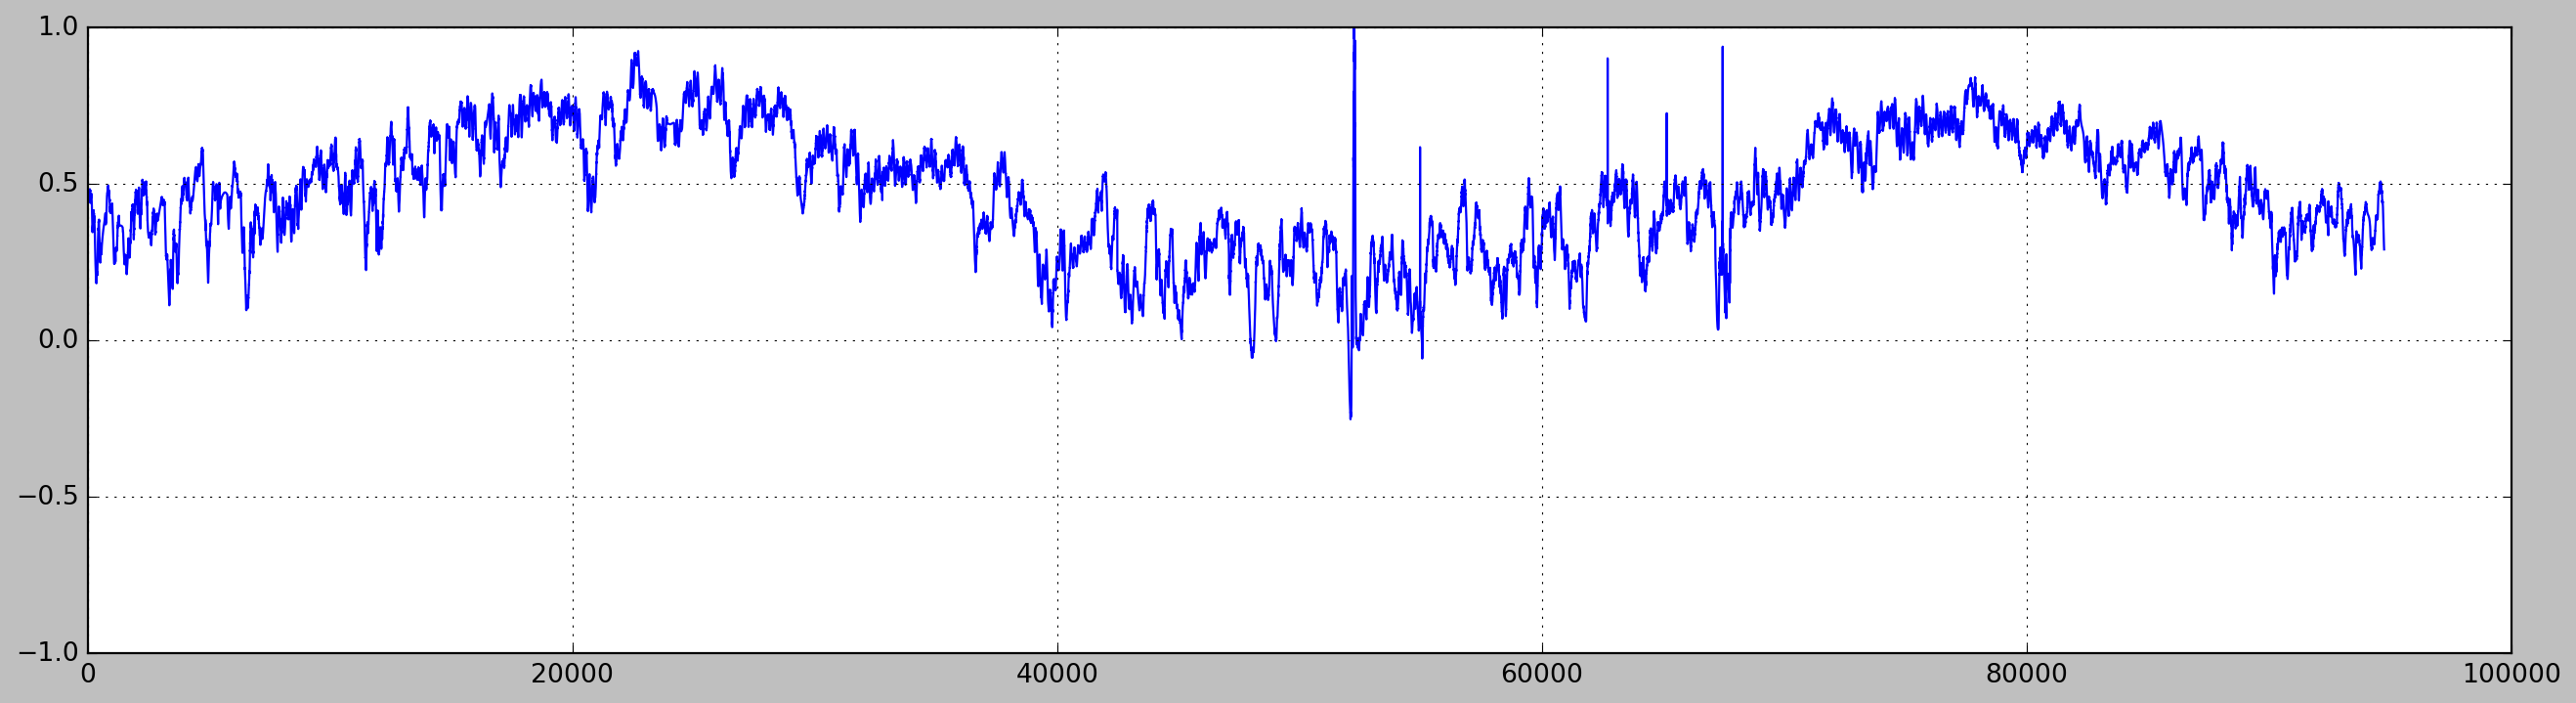

In [105]:
#predicted
plt.figure(figsize=(20, 5))
plt.grid(True)
plt.plot(salidapre)
plt.ylim(-1,1)
plt.show()

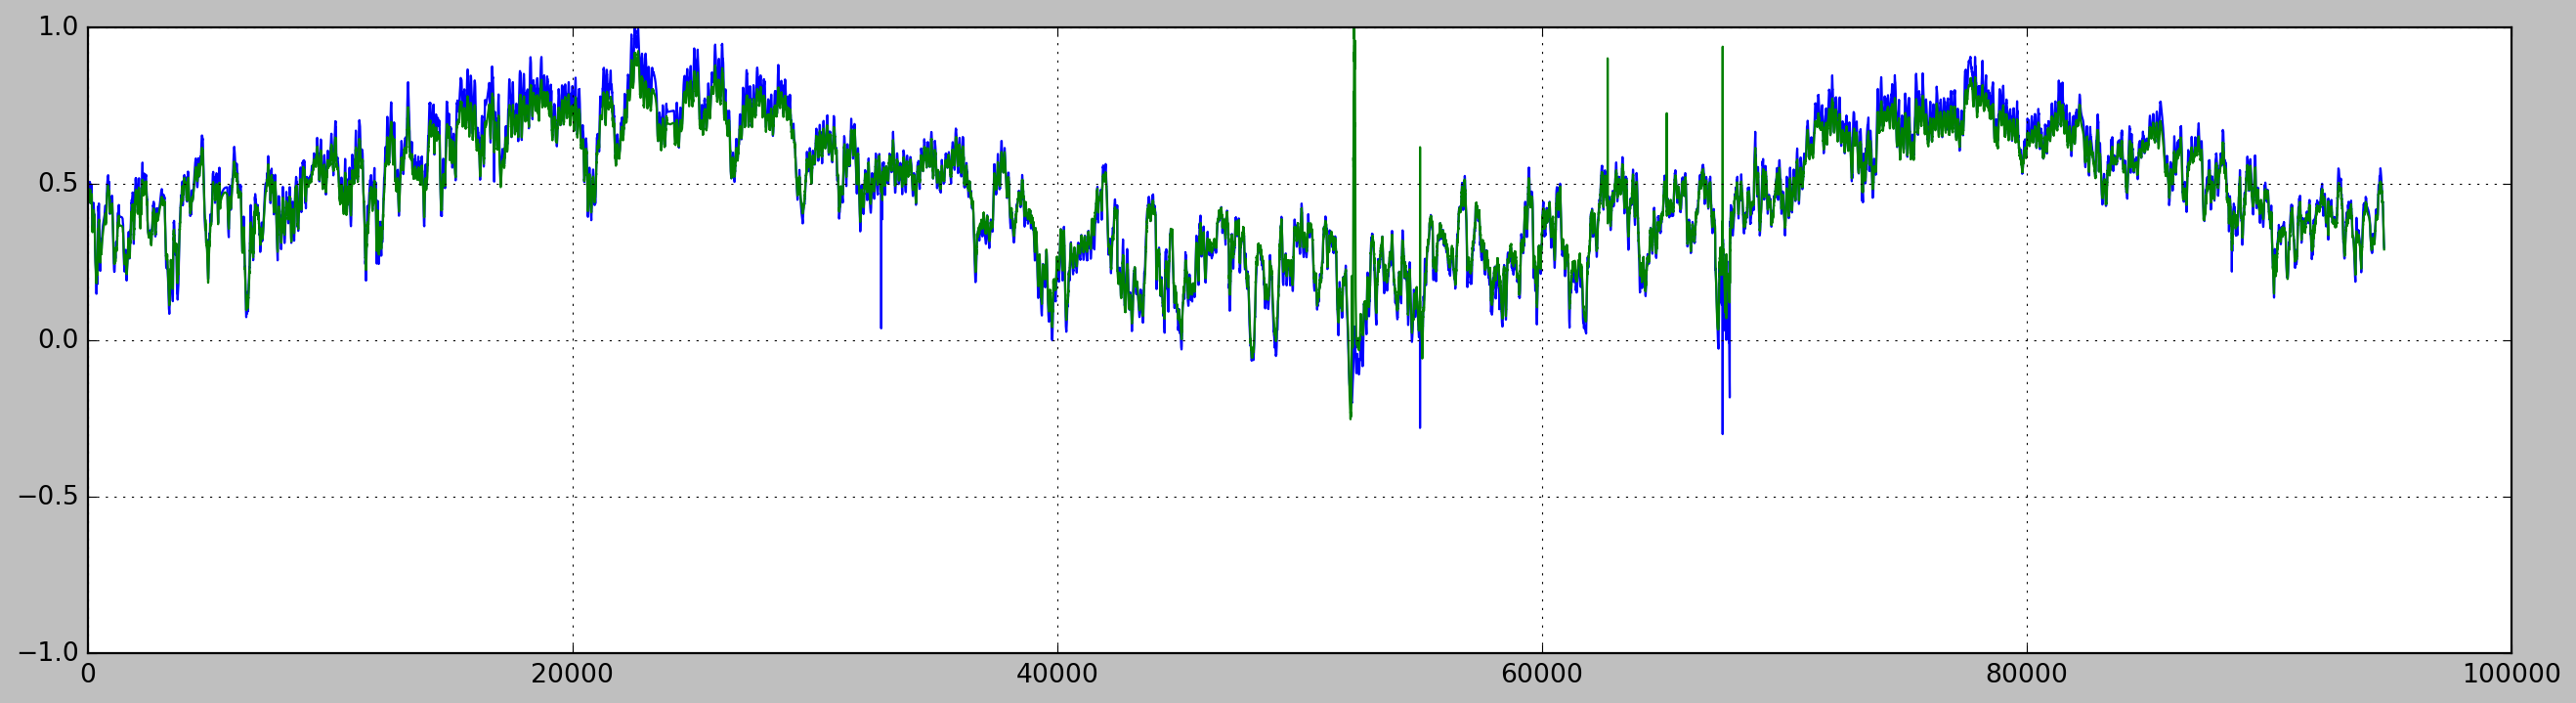

In [106]:
#target
plt.figure(figsize=(20, 5))
plt.grid(True)
plt.plot(yfulldata)
plt.plot(salidapre)
plt.ylim(-1,1)
plt.show()

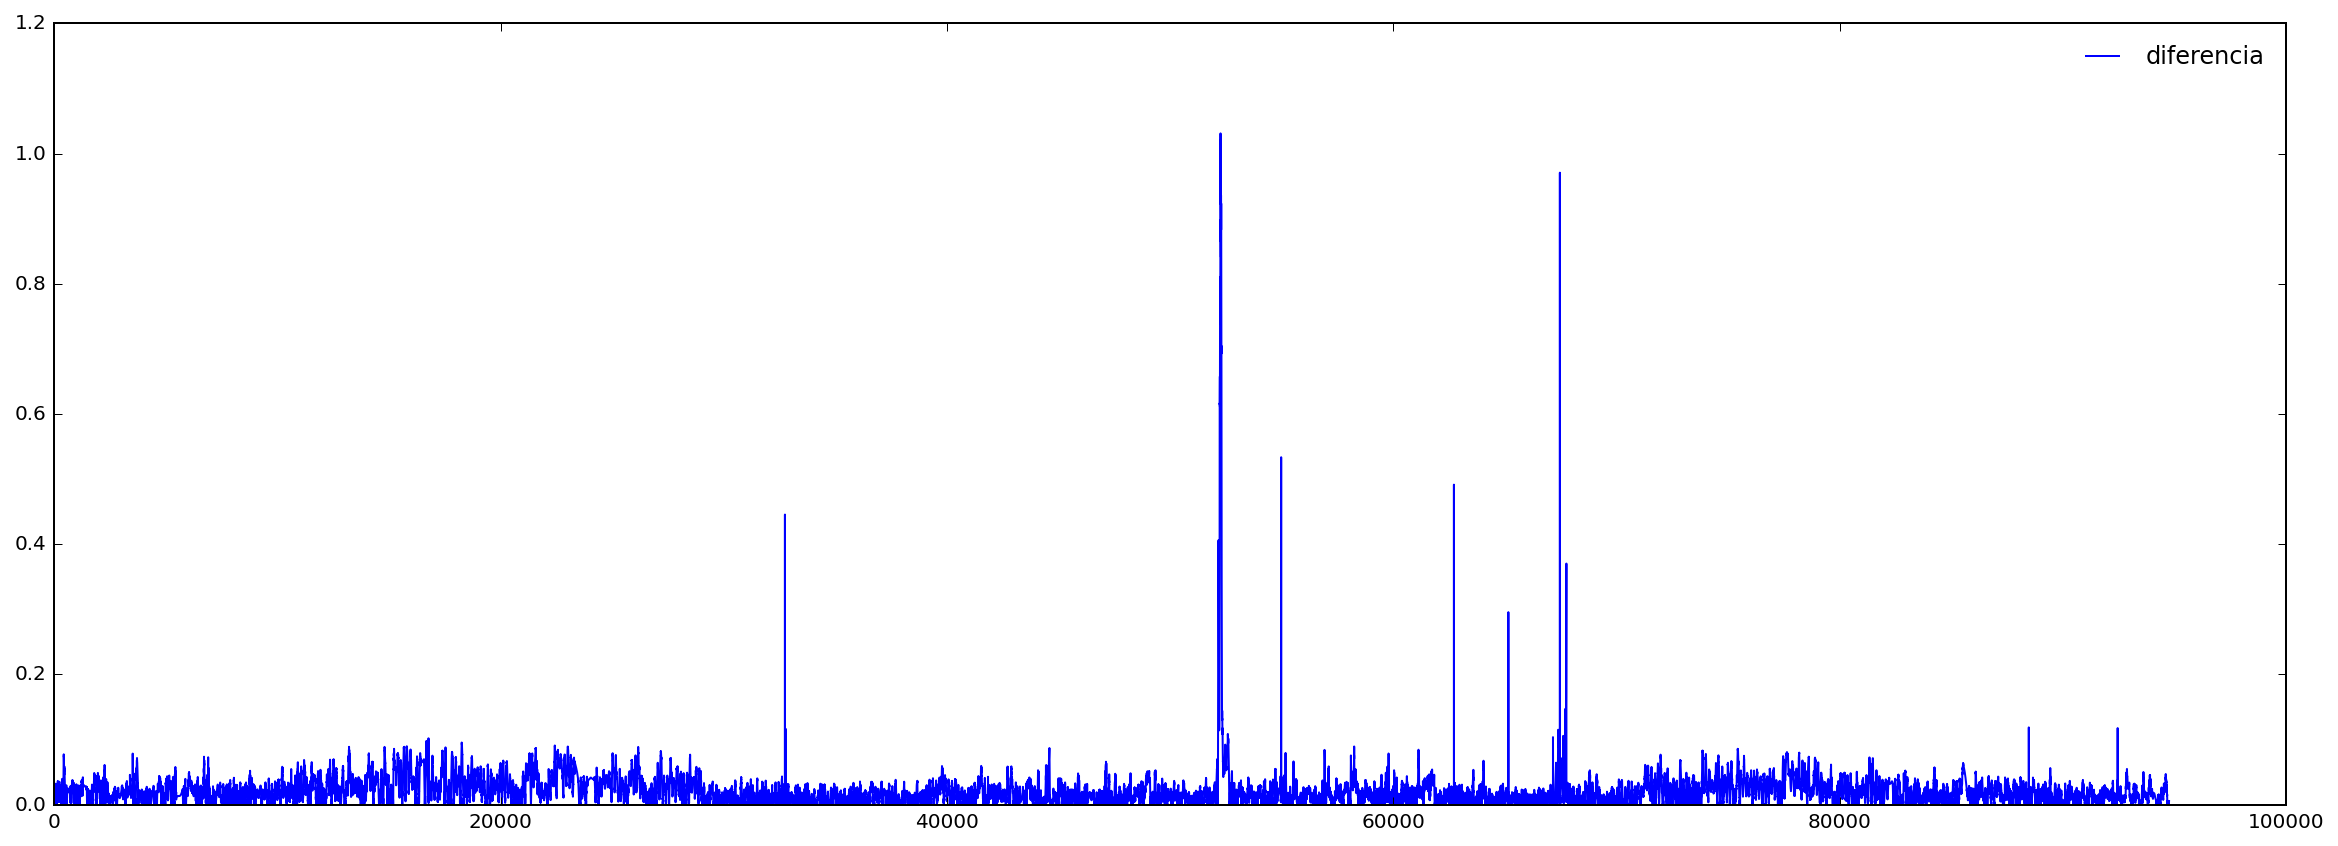

In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(diferencia, label='diferencia')
plt.legend(frameon=False)

In [108]:
# split a multivariate sequence into samples
def split_sequencesfecha(sequences, n_steps):
	X = list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x= sequences[end_ix-1]
		X.append(seq_x)
	return array(X)

In [109]:
fechatrain=split_sequencesfecha(training['date_time'], 144)
fechaval=split_sequencesfecha(validation['date_time'], 144)
fechatest=split_sequencesfecha(test['date_time'], 144)
fechafull = np.concatenate((fechatrain,fechaval,fechatest))

In [110]:
tiempo = pd.DataFrame({'date_time': fechafull})

In [111]:
x2metr = np.concatenate((xtrain,xvalidation))

In [112]:
def ma(diferencia,numdatos):
    aux = pd.DataFrame(diferencia)
    #aux['Anomaly'] = pd.DataFrame(diferencia)
    auxma=moving_average(aux, numdatos)
    diferencia2=auxma[0:len(x2metr)-1]
    meandiff=np.mean(diferencia2)
    stdiff=np.std(diferencia2)
    tiempo["diferencia"]=auxma
    tiempo["target"]=0
    thr1 = meandiff + 6*stdiff
    thr2 = meandiff + 5*stdiff
    thr3 = meandiff + 3*stdiff
    thr4 = meandiff + 2*stdiff
    
    return auxma,meandiff,stdiff,thr1,thr2,thr3,thr4

In [113]:
def threshold():
    datatest1["threshold1"]=float(threshold1)
    datatest1["threshold2"]=float(threshold2)
    datatest1["threshold3"]=float(threshold3)
    datatest1["threshold4"]=float(threshold4)
    return 

In [114]:
def monthAgo(date):
    date = pd.to_datetime(date)
    month = date-timedelta(days=30)
    return month

def tagClass(dataframe,numClasses,startFailure):
    c=0.1
    dataframe=dataframe.copy()
    dataframe['date_time']=pd.to_datetime(dataframe['date_time'])
    for i in range(numClasses):
        if i==0:
            startDate=startFailure
            finishDate=monthAgo(startFailure)
            
            dataframe.loc[(dataframe['date_time']>=finishDate)&(dataframe['date_time']<startDate),'target']=0.1
        else:
            startDate=finishDate
            finishDate=monthAgo(finishDate)
            
            dataframe.loc[(dataframe['date_time']>=finishDate)&(dataframe['date_time']<startDate),'target']=c+0.1
        c+=0.1
    
    return dataframe

In [115]:
auxma1,meandiff1,stdiff1,threshold1,threshold2,threshold3,threshold4=ma(diferencia,144)

from datetime import datetime,timedelta
tiempo['date_time']=pd.to_datetime(tiempo['date_time'])
datatest1=tagClass(tiempo,6,pd.to_datetime("21/05/2018").replace(minute=0, hour=0, second=0))
threshold()

datatest1["meandiff"]=float(meandiff1)
datatest1["stdiff"]=float(stdiff1)

meandiff1,stdiff1,threshold1,threshold2,threshold3,threshold4

(0    0.022516
 dtype: float64,
 0    0.012548
 dtype: float64,
 0    0.097807
 dtype: float64,
 0    0.085258
 dtype: float64,
 0    0.060161
 dtype: float64,
 0    0.047613
 dtype: float64)

In [116]:
auxma1[0:144]

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
139,NaN
140,NaN
141,NaN
142,NaN


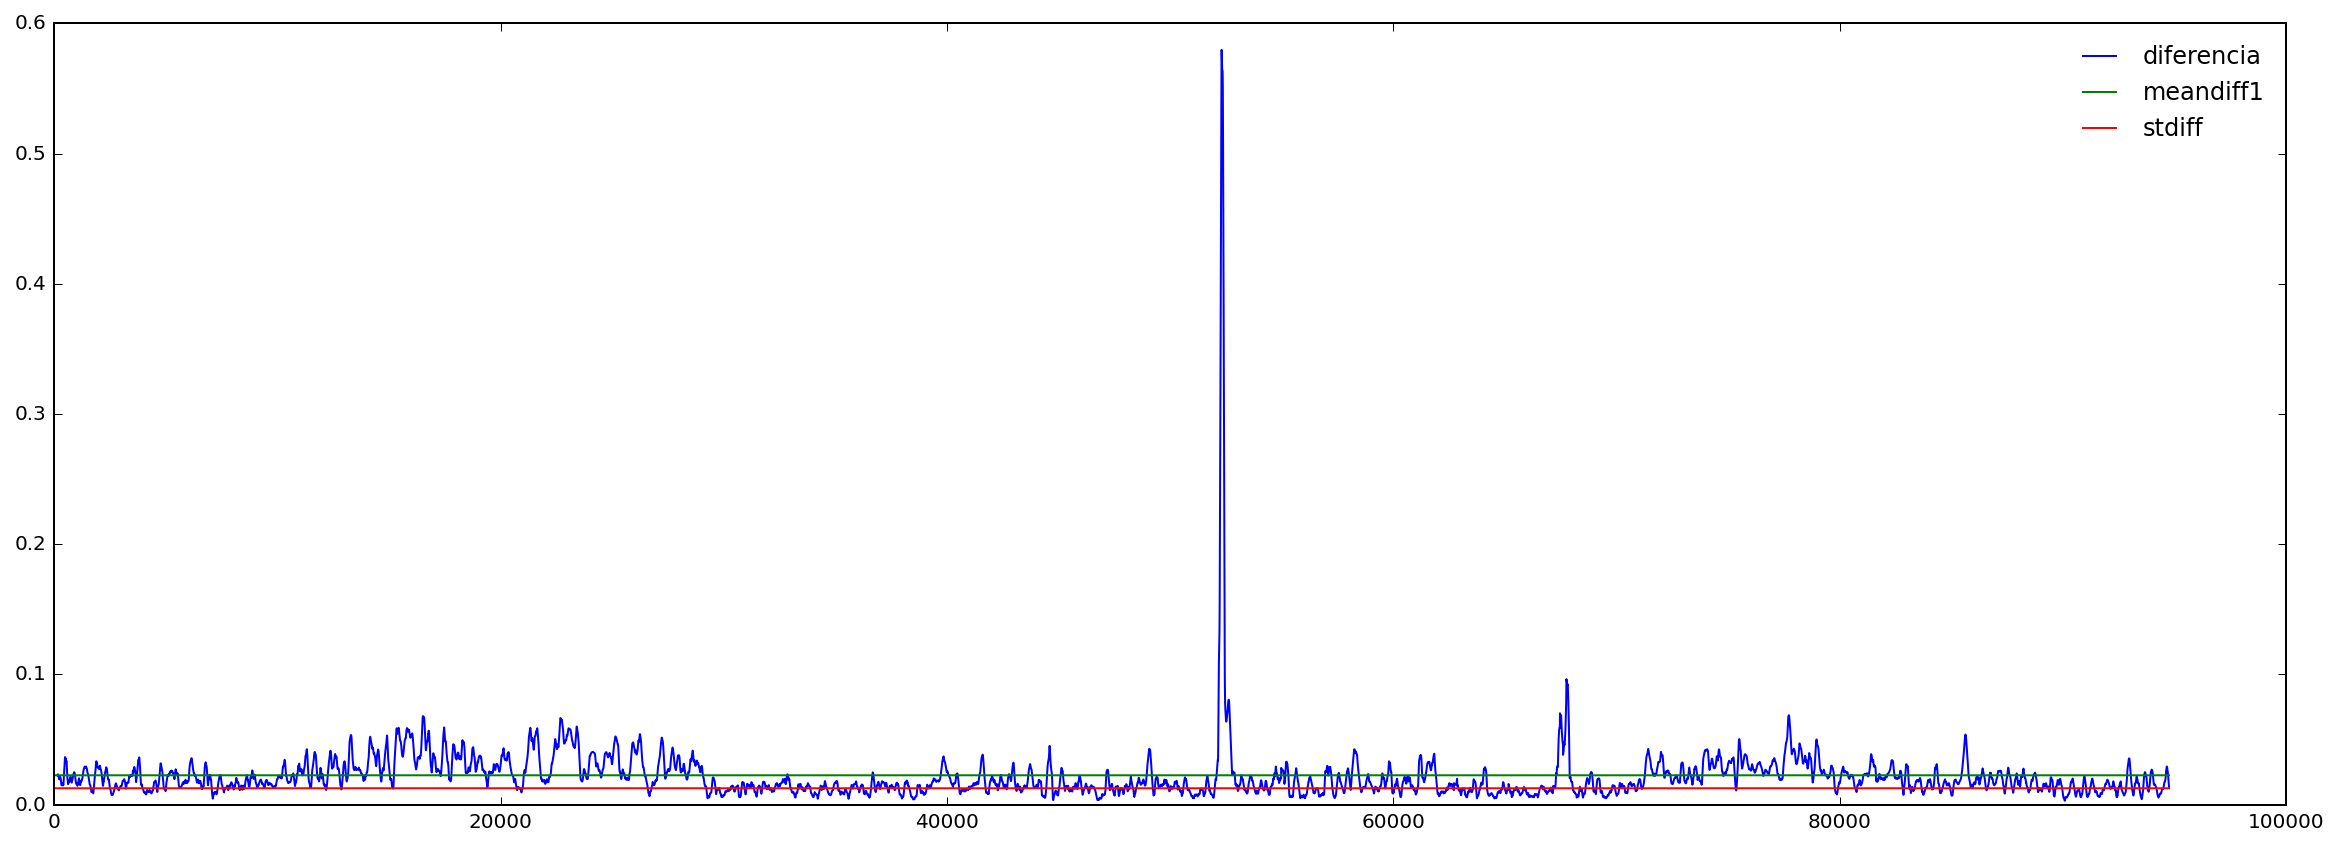

In [117]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(auxma1, label='diferencia')
plt.plot(datatest1["meandiff"], label='meandiff1')
plt.plot(datatest1["stdiff"], label='stdiff')
plt.legend(frameon=False)

In [118]:
def datatime_categorias():

    datatest1['categoria']=0
    #training
    fecha1=pd.to_datetime("2017/02/06").replace(minute=0, hour=0, second=0)
    #validation
    fecha2=pd.to_datetime(validation["date_time"][0]).replace(minute=0, hour=0, second=0)
    # fin training - validation
    fecha3=pd.to_datetime("2017/12/31").replace(minute=0, hour=0, second=0)
    ########
    fecha4=pd.to_datetime("2018/12/01").replace(minute=0, hour=0, second=0)

    datatest1.loc[(datatest1['date_time']>=fecha1)&(datatest1['date_time']<fecha2),'categoria']=200
    datatest1.loc[(datatest1['date_time']>=fecha2)&(datatest1['date_time']<=fecha3),'categoria']=300
    datatest1.loc[(datatest1['date_time']>fecha3),'categoria']=400


    return 

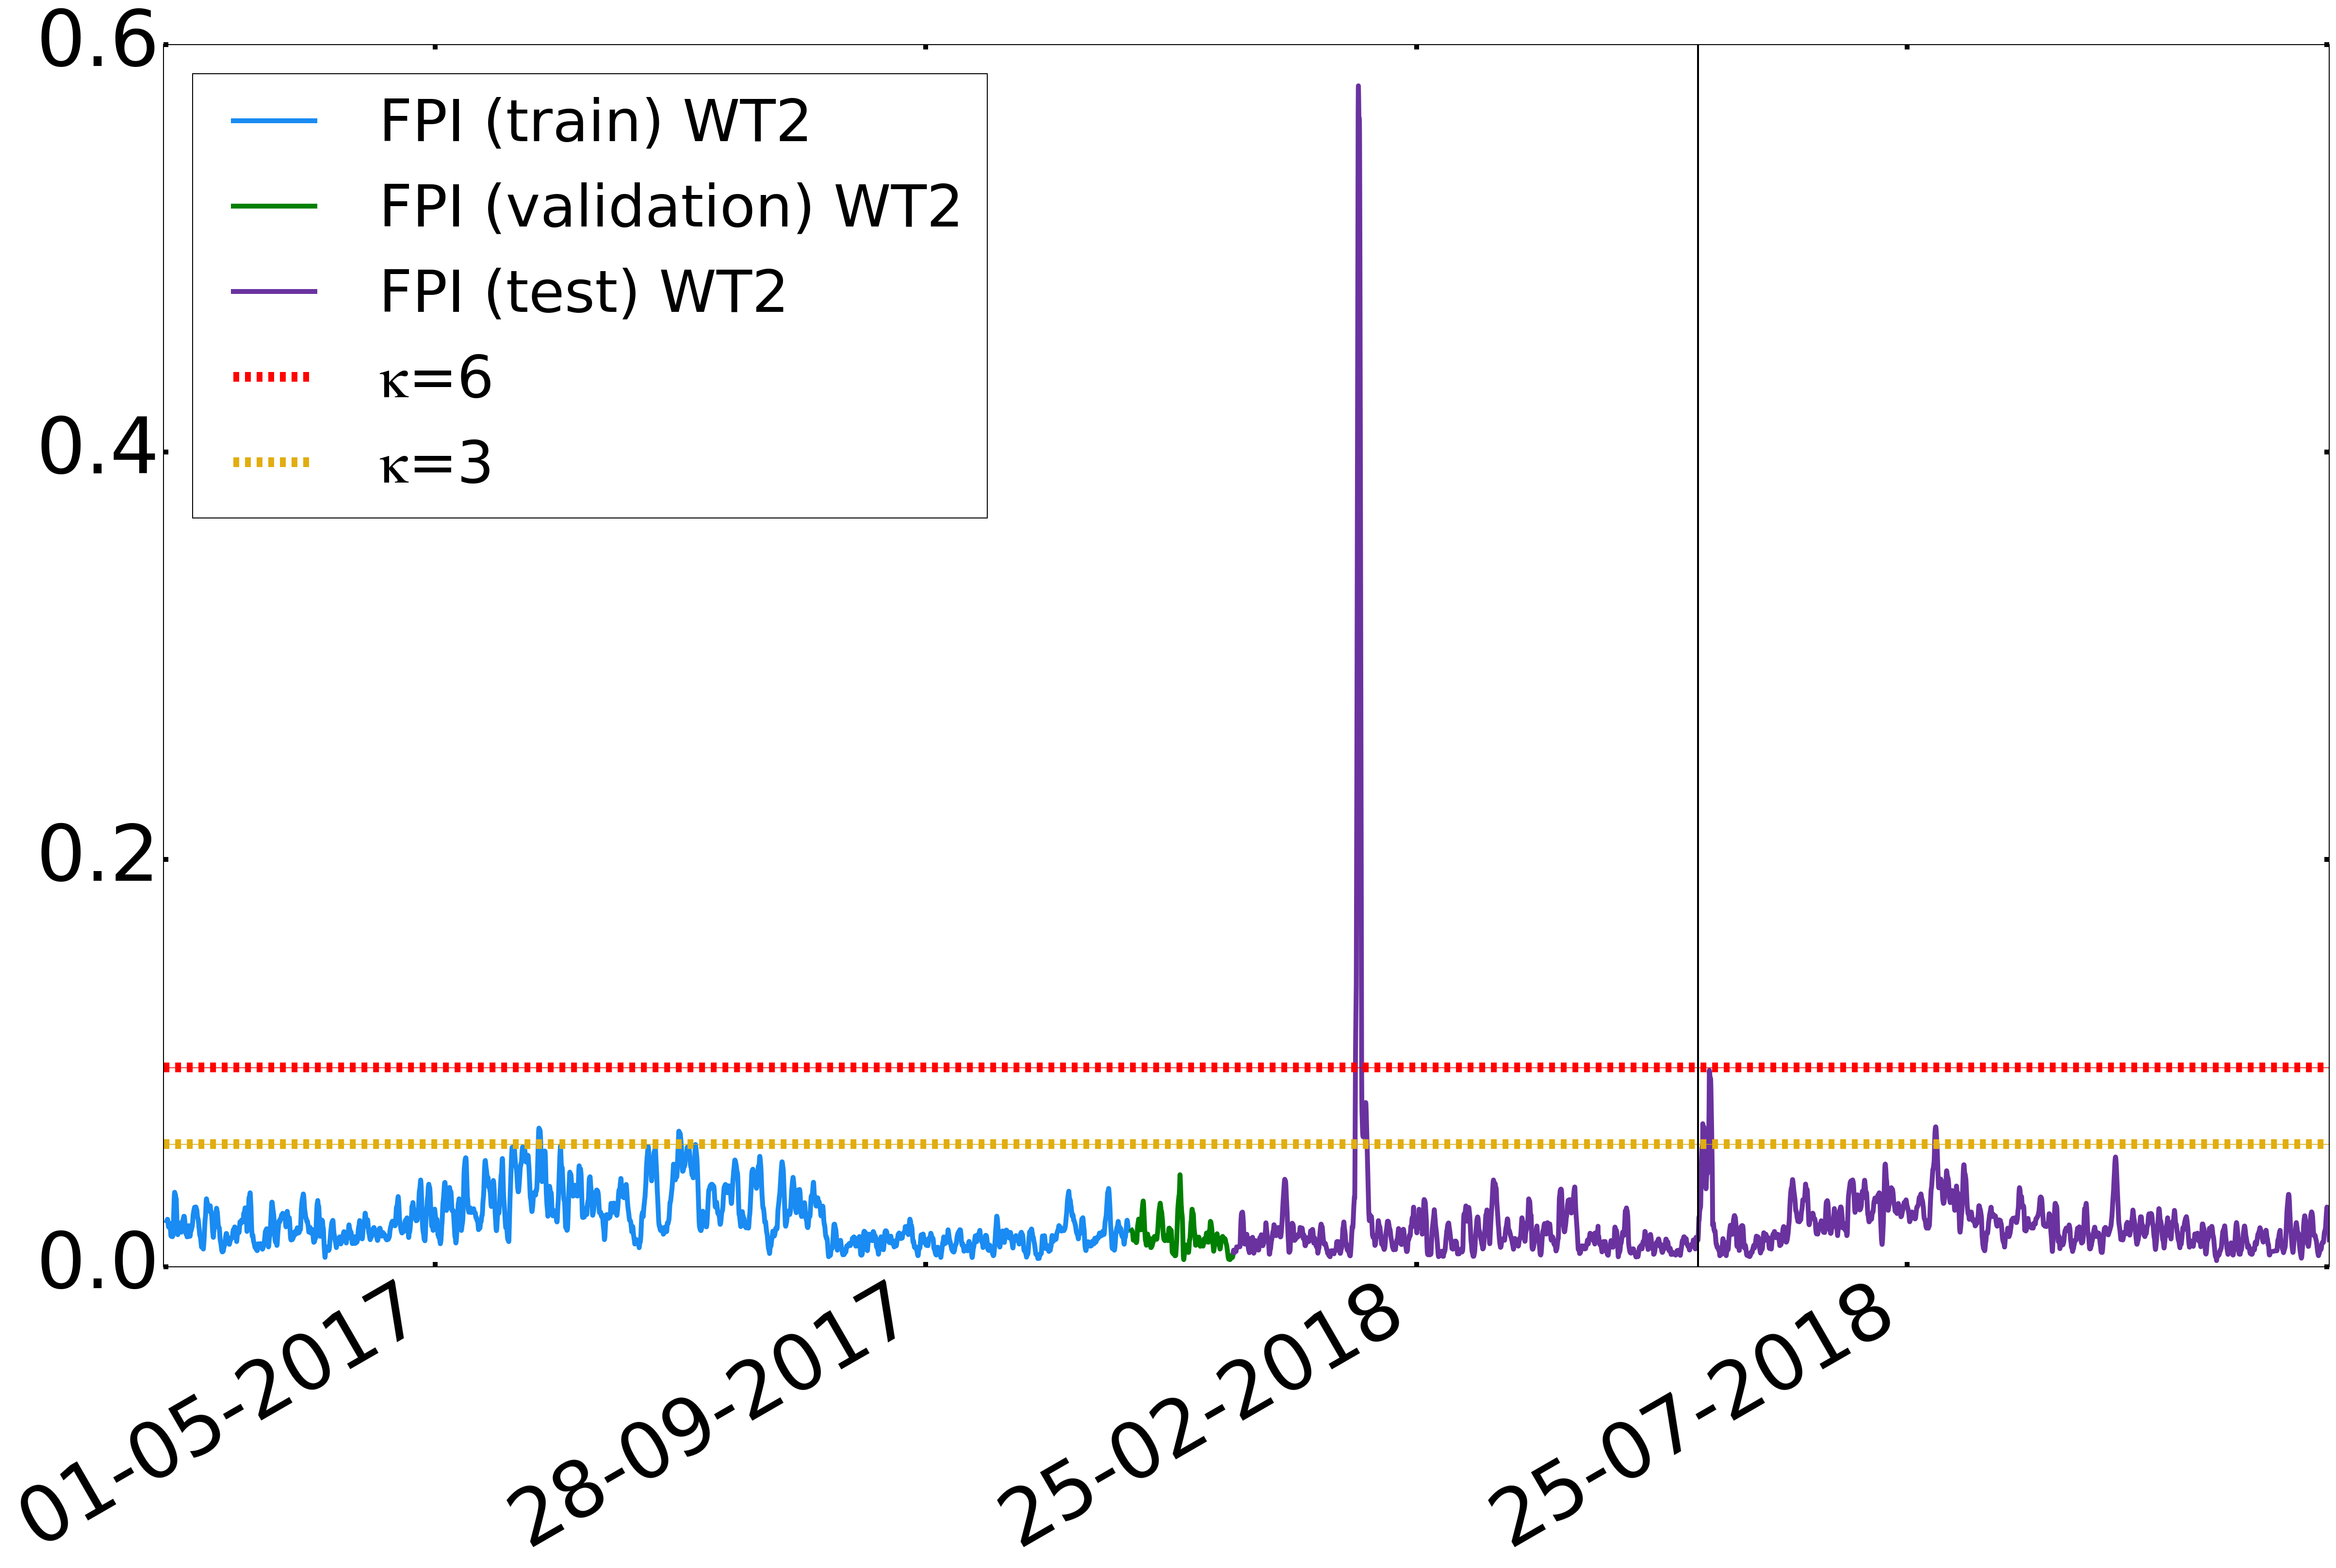

In [126]:
threshold()
datatime_categorias()

WT="WT1"
df1=datatest1[['date_time','diferencia','target','categoria']]
datosinindicador=datatest1
df2=datatest1[['date_time','diferencia','target','categoria']]

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(40, 25))
plt.style.use('classic')

plt.plot_date(datatest1[datatest1["categoria"]==200]['date_time'], datatest1[datatest1["categoria"]==200]['diferencia'], color="#198bf2", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (train) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==300]['date_time'], datatest1[datatest1["categoria"]==300]['diferencia'], color="green", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (validation) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==400]['date_time'], datatest1[datatest1["categoria"]==400]['diferencia'], color="#6a329f", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (test) WT2')
plt.plot_date(datatest1["date_time"], datatest1["threshold1"], color="red", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=6')
#plt.plot_date(datatest1["date_time"], datatest1["threshold2"], color="green", marker=".", markersize=1, linestyle='dashed',linewidth=2)
plt.plot_date(datatest1["date_time"], datatest1["threshold3"], color="#e1ad10", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=3')
#plt.plot_date(datatest1["date_time"], datatest1["threshold4"], color="yellow", marker=".", markersize=1, linestyle='dashed',linewidth=2)

plt.axvline(pd.to_datetime('2018-05-21 23:50:00'), 0, 1,color="black",linewidth=2)
#plt.axvline(x=5, ymin=0.1, ymax=0.9)



tick_spacing = 20

ax = plt.gca()



ax.xaxis.set_major_locator(mdates.DayLocator(interval=150))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end+0.1, 0.2))

plt.xticks(fontsize=80)
plt.yticks(fontsize=80)



plt.legend(fontsize=60,loc = 'upper left')
plt.gcf().autofmt_xdate()
plt.tick_params(which='both', width=5, length=5)

plt.savefig('2339144.jpg')
plt.savefig('2339144.eps')

In [94]:
########################################

In [127]:
auxma3,meandiff3,stdiff3,threshold1,threshold2,threshold3,threshold4=ma(diferencia,1008)

from datetime import datetime,timedelta
tiempo['date_time']=pd.to_datetime(tiempo['date_time'])
datatest1=tagClass(tiempo,6,pd.to_datetime("21/05/2018").replace(minute=0, hour=0, second=0))
threshold()

datatest1["meandiff"]=float(meandiff3)
datatest1["stdiff"]=float(stdiff3)

meandiff3,stdiff3,threshold1,threshold2,threshold3,threshold4

(0    0.022661
 dtype: float64,
 0    0.009785
 dtype: float64,
 0    0.081368
 dtype: float64,
 0    0.071584
 dtype: float64,
 0    0.052014
 dtype: float64,
 0    0.04223
 dtype: float64)

In [128]:
auxma3[0:1008]

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1003,NaN
1004,NaN
1005,NaN
1006,NaN


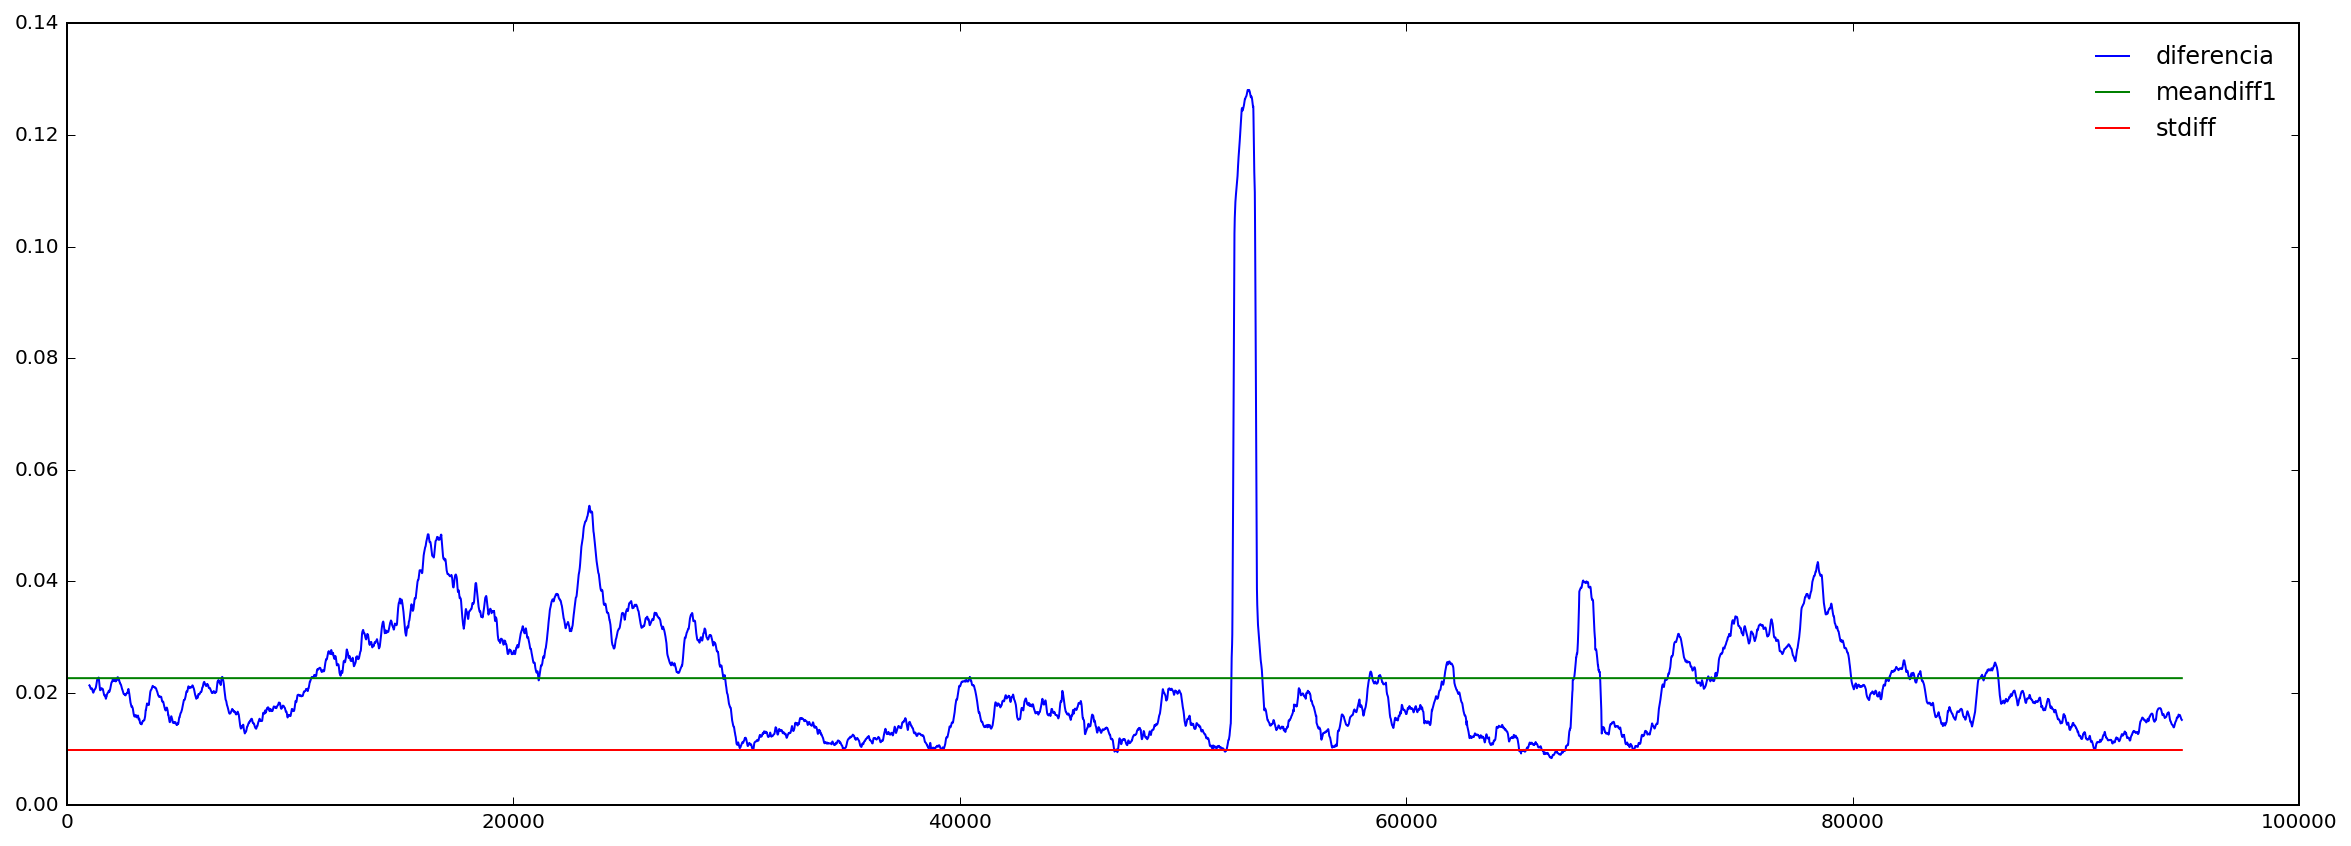

In [129]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(auxma3, label='diferencia')
plt.plot(datatest1["meandiff"], label='meandiff1')
plt.plot(datatest1["stdiff"], label='stdiff')
plt.legend(frameon=False)

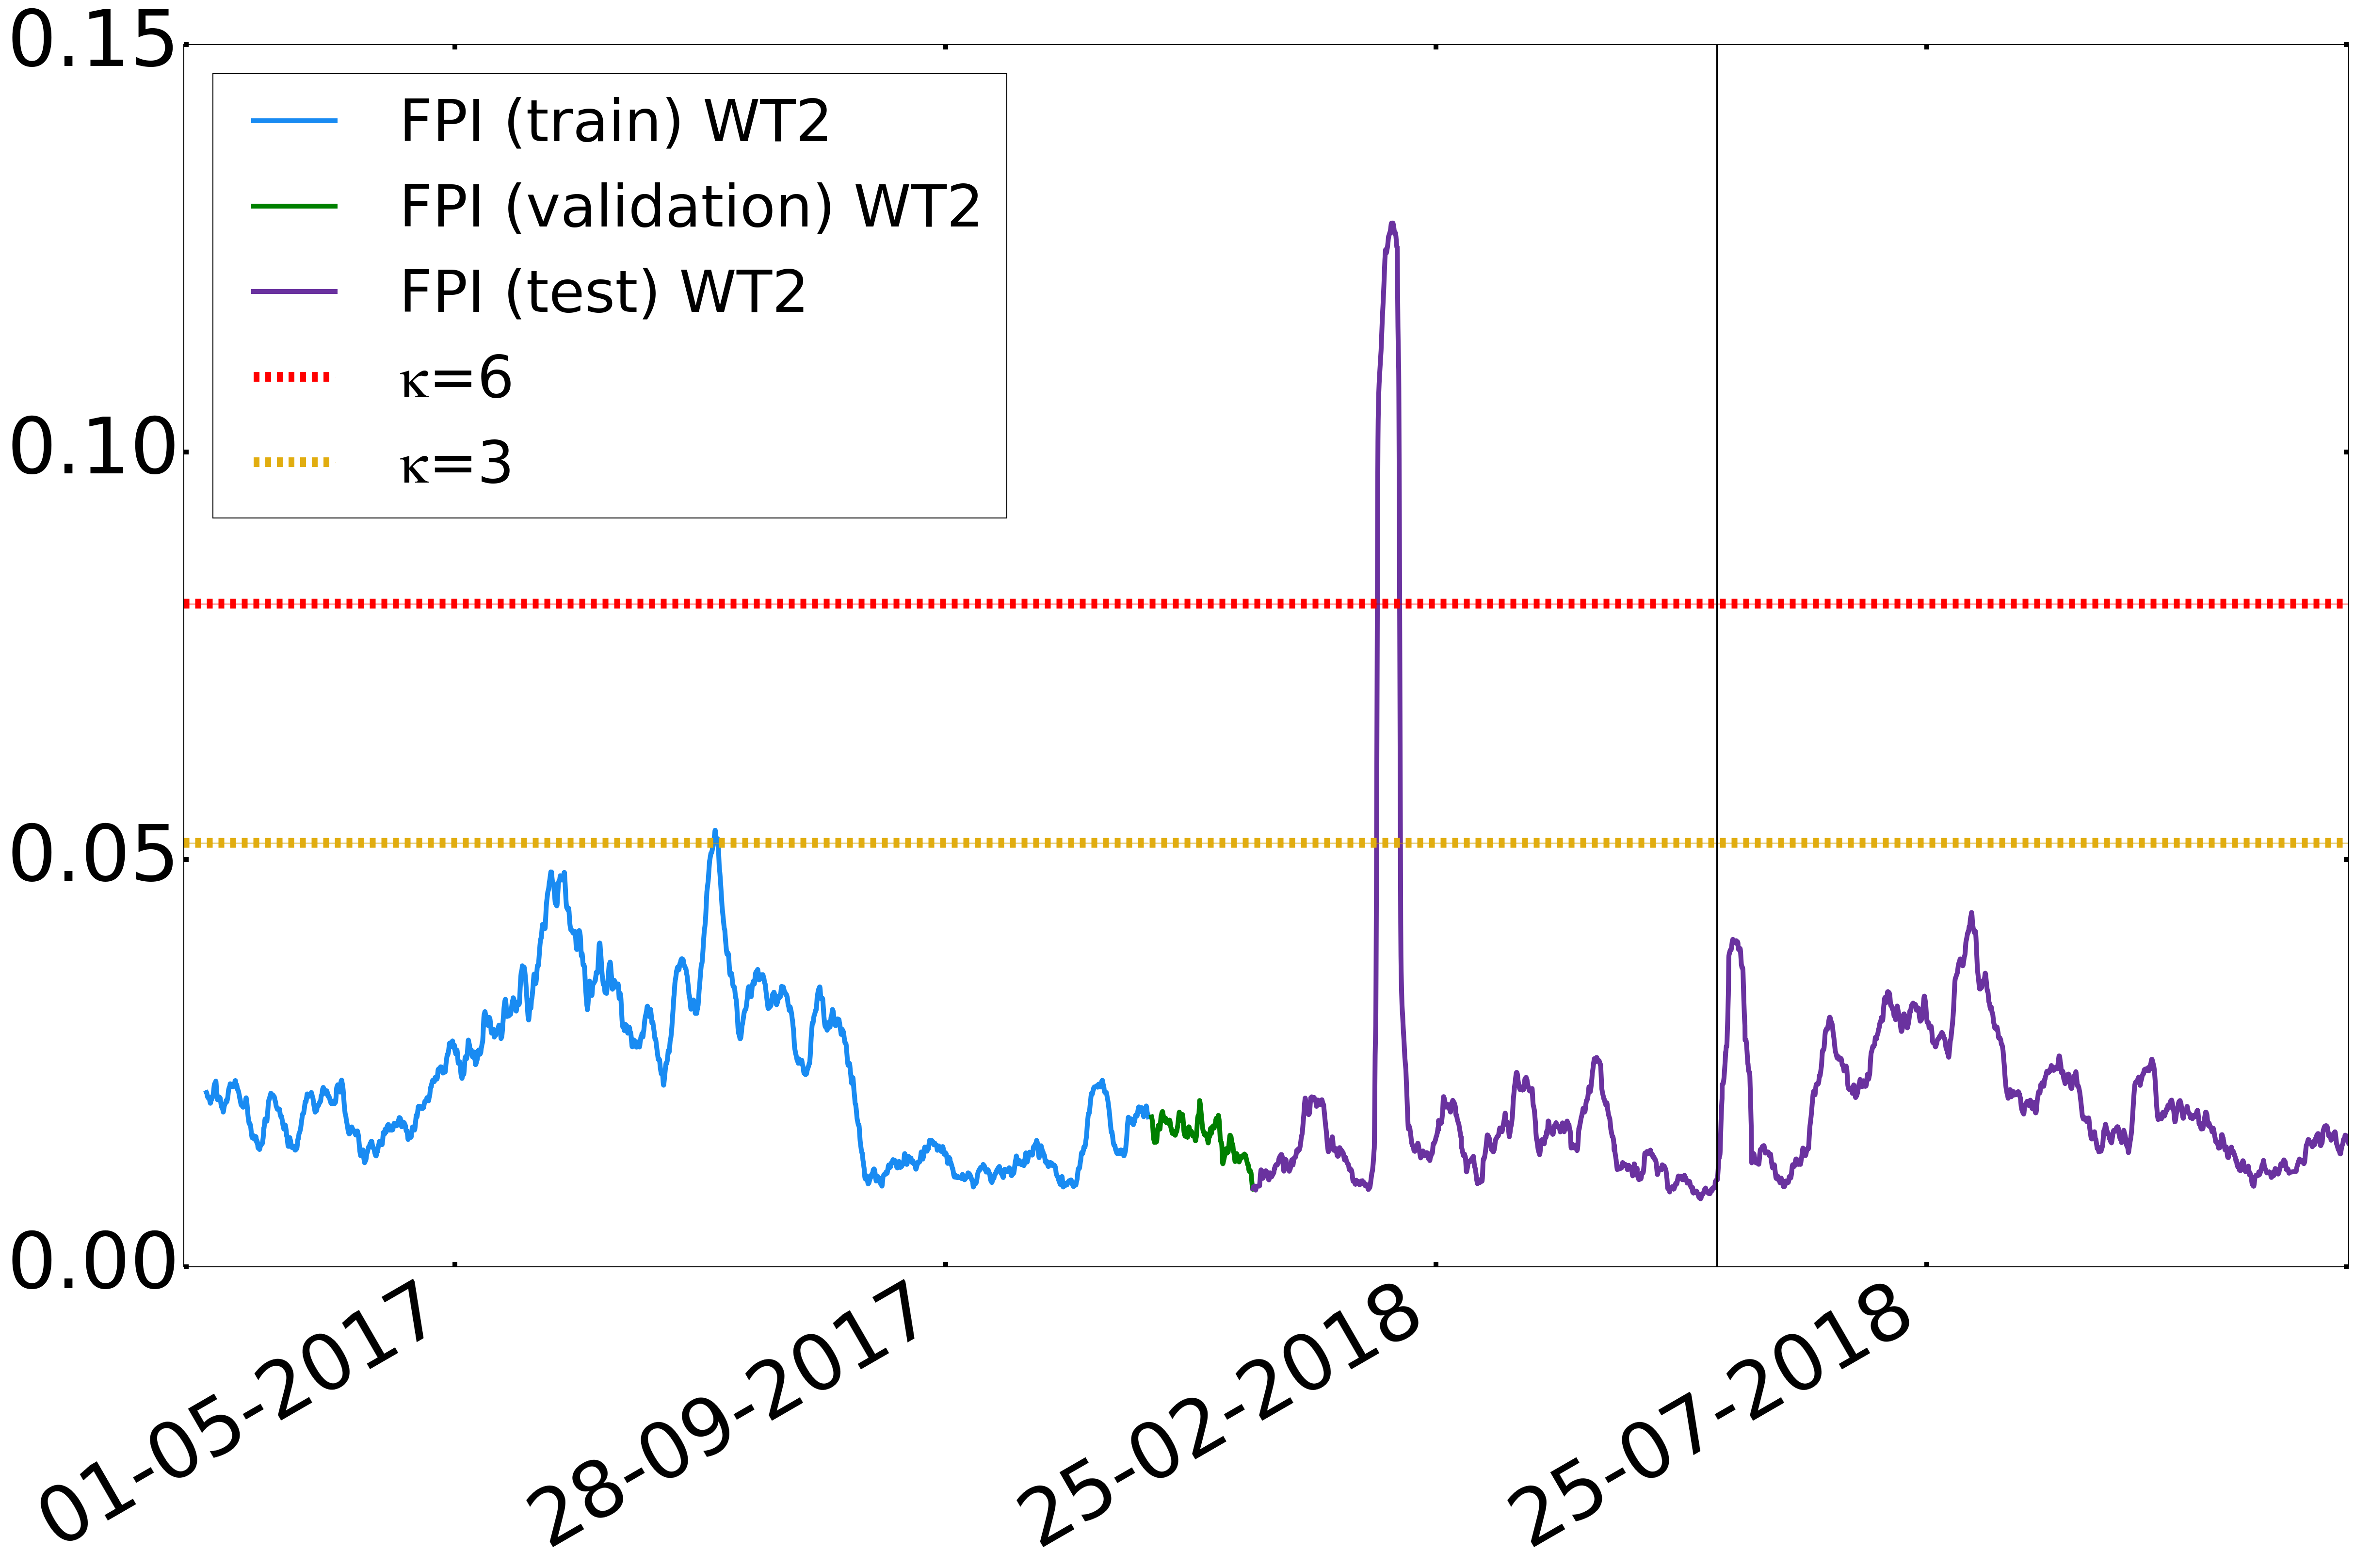

In [130]:
threshold()
datatime_categorias()


WT="WT1"
df1=datatest1[['date_time','diferencia','target','categoria']]
datosinindicador=datatest1
df2=datatest1[['date_time','diferencia','target','categoria']]

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize=(40, 25))
plt.style.use('classic')


plt.plot_date(datatest1[datatest1["categoria"]==200]['date_time'], datatest1[datatest1["categoria"]==200]['diferencia'], color="#198bf2", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (train) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==300]['date_time'], datatest1[datatest1["categoria"]==300]['diferencia'], color="green", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (validation) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==400]['date_time'], datatest1[datatest1["categoria"]==400]['diferencia'], color="#6a329f", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (test) WT2')
plt.plot_date(datatest1["date_time"], datatest1["threshold1"], color="red", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=6')
#plt.plot_date(datatest1["date_time"], datatest1["threshold2"], color="green", marker=".", markersize=1, linestyle='dashed',linewidth=2)
plt.plot_date(datatest1["date_time"], datatest1["threshold3"], color="#e1ad10", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=3')
#plt.plot_date(datatest1["date_time"], datatest1["threshold4"], color="yellow", marker=".", markersize=1, linestyle='dashed',linewidth=2)

plt.axvline(pd.to_datetime('2018-05-21 23:50:00'), 0, 1,color="black",linewidth=2)
#plt.axvline(x=5, ymin=0.1, ymax=0.9)



tick_spacing = 20

ax = plt.gca()



ax.xaxis.set_major_locator(mdates.DayLocator(interval=150))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))


start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end+0.02, 0.05))

plt.xticks(fontsize=80)
plt.yticks(fontsize=80)



plt.legend(fontsize=60,loc = 'upper left')
plt.gcf().autofmt_xdate()
plt.tick_params(which='both', width=5, length=5)
plt.savefig('23391008.jpg')
plt.savefig('23391008.eps')